In [1]:
import pandas as pd

caminho = ".\loan_data.csv"

df = pd.read_csv(caminho)

print(df.head())

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\joaom\AppData\Local\Temp\ipykernel_23680\559825775.py:3: SyntaxWarning: invalid escape sequence '\l'
  caminho = ".\loan_data.csv"


   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: C:\Users\joaom\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

Pré-Processamento

In [4]:
numeric_cols = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", 
                "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]

categorical_cols = ["person_gender", "person_education", "person_home_ownership", "loan_intent", 
                    "previous_loan_defaults_on_file"]
                    
target_col = "loan_status"

binary_categorical_cols = [col for col in categorical_cols if df[col].nunique() == 2]
multi_categorical_cols = [col for col in categorical_cols if df[col].nunique() > 2]

Label Encoding para variáveis binárias

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in binary_categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

One-Hot Encoding para variáveis multi categóricas

In [6]:
df = pd.get_dummies(df, columns=multi_categorical_cols)

Normalização dos atributos numéricos para a faixa [0, 1]

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df[target_col] = df[target_col].astype(int)

In [8]:
print(df.head())
print(f"Nova dimensão do dataset: {df.shape}")

df.to_csv("loan_approval_preprocessed.csv", index=False)

   person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
0    0.016129              0       0.008891           0.000   1.000000   
1    0.008065              0       0.000595           0.000   0.014493   
2    0.040323              0       0.000617           0.024   0.144928   
3    0.024194              0       0.009976           0.000   1.000000   
4    0.032258              1       0.008082           0.008   1.000000   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0       0.727023             0.742424                    0.035714   
1       0.392318             0.121212                    0.000000   
2       0.510974             0.666667                    0.035714   
3       0.672840             0.666667                    0.000000   
4       0.606996             0.803030                    0.071429   

   credit_score  previous_loan_defaults_on_file  ...  \
0      0.371739                               0  ...   
1      0.247826             

Análise de Correlação

In [9]:

correlation_matrix = df.corr()

print(correlation_matrix['loan_status'].sort_values(ascending=False))

loan_status                       1.000000
loan_percent_income               0.384880
loan_int_rate                     0.332005
person_home_ownership_RENT        0.255239
loan_amnt                         0.107714
loan_intent_DEBTCONSOLIDATION     0.084130
loan_intent_MEDICAL               0.065195
loan_intent_HOMEIMPROVEMENT       0.033838
person_home_ownership_OTHER       0.013645
person_education_Bachelor         0.004728
person_education_Doctorate        0.001833
person_education_High School      0.001277
person_gender                    -0.000561
person_education_Associate       -0.002765
person_education_Master          -0.004741
credit_score                     -0.007647
cb_person_cred_hist_length       -0.014851
person_emp_exp                   -0.020481
person_age                       -0.021476
loan_intent_PERSONAL             -0.022488
loan_intent_EDUCATION            -0.064006
loan_intent_VENTURE              -0.085992
person_home_ownership_OWN        -0.093666
person_inco

Dividir dados em teste e treinamento

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["loan_status"])
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Treinar Árvore de Decisão (Gini)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 89.91%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3444
           1       0.79      0.78      0.78      1056

    accuracy                           0.90      4500
   macro avg       0.86      0.86      0.86      4500
weighted avg       0.90      0.90      0.90      4500



Treinar Árvore de Decisão (Entropy)

In [27]:
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_classifier_entropy.fit(X_train, y_train)

y_pred = dt_classifier_entropy.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 90.24%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3444
           1       0.80      0.77      0.79      1056

    accuracy                           0.90      4500
   macro avg       0.87      0.86      0.86      4500
weighted avg       0.90      0.90      0.90      4500



KNN (5)

In [28]:
from sklearn.neighbors import KNeighborsClassifier


knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train, y_train)

y_pred = knn_5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 88.24%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3444
           1       0.78      0.69      0.73      1056

    accuracy                           0.88      4500
   macro avg       0.85      0.82      0.83      4500
weighted avg       0.88      0.88      0.88      4500



KNN(10)

In [29]:
from sklearn.neighbors import KNeighborsClassifier


knn_10 = KNeighborsClassifier(n_neighbors=10)

knn_10.fit(X_train, y_train)

y_pred = knn_10.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 88.62%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3444
           1       0.85      0.62      0.72      1056

    accuracy                           0.89      4500
   macro avg       0.87      0.80      0.82      4500
weighted avg       0.88      0.89      0.88      4500



MLP (Relu e 2 camadas ocultas)

In [30]:
from sklearn.neural_network import MLPClassifier


mlp_1 = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', max_iter=1000)
mlp_1.fit(X_train, y_train)
y_pred_1 = mlp_1.predict(X_test)

print("Arquitetura 1 (activation='relu'):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_1)*100:.2f}%")
print(classification_report(y_test, y_pred_1))

Arquitetura 1 (activation='relu'):
Acurácia: 91.31%
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3444
           1       0.88      0.73      0.80      1056

    accuracy                           0.91      4500
   macro avg       0.90      0.85      0.87      4500
weighted avg       0.91      0.91      0.91      4500



MLP (Relu 3 camadas)

In [32]:
mlp_2= MLPClassifier(hidden_layer_sizes=(100,50,25), activation='relu', max_iter=1000)
mlp_2.fit(X_train, y_train)
y_pred_2 = mlp_2.predict(X_test)

print("Arquitetura 2 (activation='relu'):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_2)*100:.2f}%")
print(classification_report(y_test, y_pred_2))

Arquitetura 2 (activation='relu'):
Acurácia: 89.87%
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3444
           1       0.79      0.77      0.78      1056

    accuracy                           0.90      4500
   macro avg       0.86      0.85      0.86      4500
weighted avg       0.90      0.90      0.90      4500



MLP (tahn e 2 camadas ocultas)

In [31]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(50,30), activation='tanh', max_iter=1000)
mlp_3.fit(X_train, y_train)
y_pred_3 = mlp_3.predict(X_test)

print("\nArquitetura 1 (activation='tanh'):")
print(f"Acurácia: { accuracy_score(y_test, y_pred_3)*100:.2f}% ")
print(classification_report(y_test, y_pred_3))


Arquitetura 1 (activation='tanh'):
Acurácia: 91.16% 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3444
           1       0.86      0.74      0.80      1056

    accuracy                           0.91      4500
   macro avg       0.89      0.85      0.87      4500
weighted avg       0.91      0.91      0.91      4500



MLP (tahn e 3 camadas ocultas)

In [ ]:
mlp_4 = MLPClassifier(hidden_layer_sizes=(100, 50,25), activation='tanh', max_iter=1000)
mlp_4.fit(X_train, y_train)
y_pred_4 = mlp_4.predict(X_test)

print("\nArquitetura 2 (activation='tanh'):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_4)*100:.2f}%")
print(classification_report(y_test, y_pred_4))


Arquitetura 2 (activation='tanh'):
Acurácia: 0.89
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3444
           1       0.78      0.75      0.77      1056

    accuracy                           0.89      4500
   macro avg       0.85      0.84      0.85      4500
weighted avg       0.89      0.89      0.89      4500



K-Means

In [34]:
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter
from sklearn import metrics



myset = set(y_train) 
clusters = len(myset) 

kmeans = KMeans(n_clusters = clusters)
kmeans = kmeans.fit(X_train)


labels = kmeans.labels_

map_labels = []

for i in range(clusters):
  map_labels.append([])

new_y_train = y_train.to_list()

for i in range(len(y_train)):
  for c in range(clusters):
    if labels[i] == c:
      map_labels[c].append(new_y_train[i])


mapping = {}

for i in range(clusters):
  final = Counter(map_labels[i])
  value = final.most_common(1)[0][0]
  mapping[i] = value

result = kmeans.predict(X_test)
result = [mapping[i] for i in result] ## mapeamento

acc = metrics.accuracy_score(result, y_test)
show = round(acc * 100)
print("{}%".format(show))

print(list(result))
print(list(y_test))

77%
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Protocolo Experimental

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

folds = 10
models = {
    "KMeans": kmeans,
    "Árvore de Decisão (gini)": dt_classifier,
    "Árvore de Decisão (entropy)": dt_classifier_entropy,
    "KNN (k=5)": knn_5,
    "KNN (k=10)": knn_10,
    "MLP ReLU (Arquitetura 1)": mlp_1,
    "MLP ReLU (Arquitetura 2)": mlp_2,
    "MLP tanh (Arquitetura 1)": mlp_3,
    "MLP tanh (Arquitetura 2)": mlp_4,
}

results = {}
mlp_errors = {}

# Aplicando K-Fold para cada modelo
for model_name, model in models.items():
    print(f"Treinando {model_name} com K-Fold...")

    if 'MLP' in model_name:
        model.set_params(verbose=False, warm_start=False)

    scores = cross_val_score(model, X, y, cv=folds, scoring='accuracy')

    results[model_name] = np.mean(scores)

    if 'MLP' in model_name:
        if model_name not in mlp_errors:
            mlp_errors[model_name] = []
        mlp_errors[model_name].append(model.loss_curve_)

for model_name, accuracy in results.items():
    print(f"{model_name}: Acurácia Média com K-Fold (10-fold) = {accuracy * 100:.2f}%")


Treinando KMeans com K-Fold...
Treinando Árvore de Decisão (gini) com K-Fold...
Treinando Árvore de Decisão (entropy) com K-Fold...
Treinando KNN (k=5) com K-Fold...
Treinando KNN (k=10) com K-Fold...
Treinando MLP ReLU (Arquitetura 1) com K-Fold...
Treinando MLP ReLU (Arquitetura 2) com K-Fold...
Treinando MLP tanh (Arquitetura 1) com K-Fold...


Relatório


Resultados Finais (Acurácia Média em 10 folds):
KMeans: Acurácia: 16.13%
Árvore de Decisão (gini): Acurácia: 89.91%
Árvore de Decisão (entropy): Acurácia: 90.24%
KNN (k=5): Acurácia: 88.24%
KNN (k=10): Acurácia: 88.62%
MLP ReLU (Arquitetura 1): Acurácia: 91.60%
MLP ReLU (Arquitetura 2): Acurácia: 89.56%
MLP tanh (Arquitetura 1): Acurácia: 91.31%
MLP tanh (Arquitetura 2): Acurácia: 89.91%


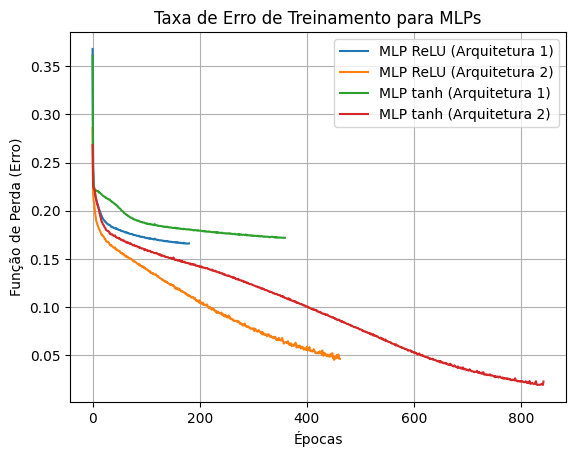


Tabela de Resultados:
                             Acurácia Média  Taxa de Erro Média
MLP ReLU (Arquitetura 1)          91.600000            8.400000
MLP tanh (Arquitetura 1)          91.311111            8.688889
Árvore de Decisão (entropy)       90.244444            9.755556
Árvore de Decisão (gini)          89.911111           10.088889
MLP tanh (Arquitetura 2)          89.911111           10.088889
MLP ReLU (Arquitetura 2)          89.555556           10.444444
KNN (k=10)                        88.622222           11.377778
KNN (k=5)                         88.244444           11.755556
KMeans                            16.133333           83.866667


In [20]:
import matplotlib.pyplot as plt


print("\nResultados Finais (Acurácia Média em 10 folds):")
for model_name, accuracy in results.items():
    print(f"{model_name}: Acurácia: {accuracy * 100:.2f}%")

for model_name, loss_curves in mlp_errors.items():
    if len(loss_curves) > 0:
        avg_loss_curve = np.mean(loss_curves, axis=0)
        epochs = np.arange(len(avg_loss_curve))
        plt.plot(epochs, avg_loss_curve, label=model_name)

plt.title('Taxa de Erro de Treinamento para MLPs')
plt.xlabel('Épocas')
plt.ylabel('Função de Perda (Erro)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

results_table = pd.DataFrame.from_dict(results, orient='index', columns=['Acurácia Média'])
results_table['Taxa de Erro Média'] = 1 - results_table['Acurácia Média']
results_table = results_table.sort_values(by='Acurácia Média', ascending=False)

print("\nTabela de Resultados:")
print(results_table * 100)